In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:

import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizer, TFBertForSequenceClassification



In [3]:

df_train = pd.read_csv("/content/drive/MyDrive/train.txt", delimiter=';', header=None, names=['sentence','label'])
df_test = pd.read_csv("/content/drive/MyDrive/test.txt", delimiter=';', header=None, names=['sentence','label'])
df_val = pd.read_csv("/content/drive/MyDrive/val.txt", delimiter=';', header=None, names=['sentence','label'])


In [4]:
df = pd.concat([df_train,df_test,df_val])

In [5]:
df['label'].unique()

array(['sadness', 'anger', 'love', 'surprise', 'fear', 'joy'],
      dtype=object)

In [6]:
labelencoder = LabelEncoder()
df['label_enc'] = labelencoder.fit_transform(df['label'])

In [7]:
df[['label','label_enc']].drop_duplicates(keep='first')

,label,label_enc
0,sadness,4
2,anger,0
3,love,3
6,surprise,5
7,fear,1
8,joy,2


In [8]:
df.rename(columns={'label':'label_desc'},inplace=True)
df.rename(columns={'label_enc':'label'},inplace=True)

In [9]:
# create label and sentence list
sentences = df.sentence.values

#check distribution of data based on labels
print("Distribution of data based on labels: ",df.label.value_counts())

# Set the maximum sequence length. The longest sequence in our training set is 47, but we'll leave room on the end anyway.
# In the original paper, the authors used a length of 512.
MAX_LEN = 256


Distribution of data based on labels:  2    6761
4    5797
0    2709
1    2373
3    1641
5     719
Name: label, dtype: int64


In [16]:
negation_words = ["not", "no", "never", "none", "nobody", "nowhere", "nothing", "neither", "nor", "hardly", "scarcely", "barely"]

def add_negation_tags(text):
    words = text.split()
    modified_words = []
    negation = False
    for word in words:
        if word.lower() in negation_words:
            negation = True
            modified_words.append(word)
        elif negation:
            modified_words.append('NOT_' + word)
        else:
            modified_words.append(word)
    return ' '.join(modified_words)

In [17]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
input_ids = [tokenizer.encode(add_negation_tags(sent), add_special_tokens=True, max_length=MAX_LEN, pad_to_max_length=True) for sent in sentences]
labels = df.label.values
print("Actual sentence before tokenization: ", sentences[2])
print("Encoded Input from dataset: ", input_ids[2])

## Create attention mask
attention_masks = []
## Create a mask of 1 for all input tokens and 0 for all padding tokens
attention_masks = [[float(i > 0) for i in seq] for seq in input_ids]
print(attention_masks[2])


Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2645: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


Actual sentence before tokenization:  im grabbing a minute to post i feel greedy wrong
Encoded Input from dataset:  [101, 10047, 9775, 1037, 3371, 2000, 2695, 1045, 2514, 20505, 3308, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0

In [18]:
# Split data into train and test sets
# Convert encoded_data.input_ids to NumPy array
x_data = np.array(input_ids)
y_data = labels

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)


In [19]:
# Load pre-trained BERT model
num_classes = len(labelencoder.classes_)

bert_model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_classes)



model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [20]:
from transformers import AdamWeightDecay

# Instantiate the optimizer
optimizer = AdamWeightDecay(learning_rate=2e-5)

# Compile the BERT model with the optimizer
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = ['accuracy']
bert_model.compile(optimizer=optimizer, loss=loss, metrics=metrics)


In [21]:
# Train the model with early stopping
history = bert_model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=10, batch_size=32)

Epoch 1/10


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: for/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
500/500 [==============================] - 980s 2s/step - loss: 1.0270 - accuracy: 0.6081 - val_loss: 0.2934 - val_accuracy: 0.9090
Epoch 2/10
500/500 [==============================] - 903s 2s/step - loss: 0.2092 - accuracy: 0.9246 - val_loss: 0.1795 - val_accuracy: 0.9268
Epoch 3/10
500/500 [==============================] - 903s 2s/step - loss: 0.1296 - accuracy: 0.9433 - val_loss: 0.1341 - val_accuracy: 0.9358
Epoch 4/10
500/500 [==============================] - 902s 2s/step - loss: 0.1041 - accuracy: 0.9499 - val_loss: 0.1381 - val_accuracy: 0.9350
Epoch 5/10
500/500 [==============================] - 902s 2s/step - loss: 0.0948 - accuracy: 0.9520 - val_loss: 0.1502 - val_accuracy: 0.9358
Epoch 6/10
500/500 [==============================] - 902s 2s/step - loss: 0.0891 - accuracy: 0.9561 - val_loss: 0.1493 - val_accuracy: 0.9355
Epoch 7/10
500/

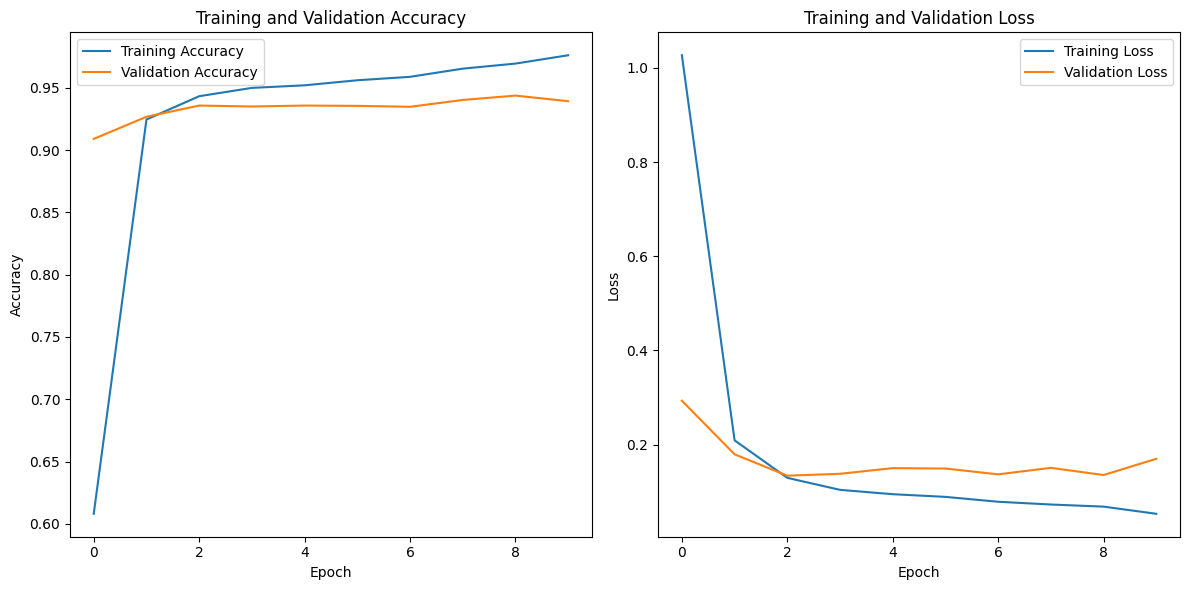

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Plot training history (accuracy and loss)
plt.figure(figsize=(12, 6))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [23]:
# Evaluate model
loss, accuracy = bert_model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")



125/125 [==============================] - 68s 542ms/step - loss: 0.1700 - accuracy: 0.9392
Test Loss: 0.16998685896396637, Test Accuracy: 0.9392499923706055


In [24]:
# Save the model
bert_model.save_pretrained("/content/drive/MyDrive/bert_model")



In [25]:
loaded_bert_model = TFBertForSequenceClassification.from_pretrained("/content/drive/MyDrive/bert_model", num_labels=num_classes)




Some layers from the model checkpoint at /content/drive/MyDrive/bert_model were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at /content/drive/MyDrive/bert_model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [26]:
# Calculate predictions on test set
y_pred = loaded_bert_model.predict(x_test)
logits = y_pred.logits  # Extract logits array from TFSequenceClassifierOutput
y_pred_classes = tf.argmax(logits, axis=1).numpy()
y_true = y_test

125/125 [==============================] - 78s 546ms/step


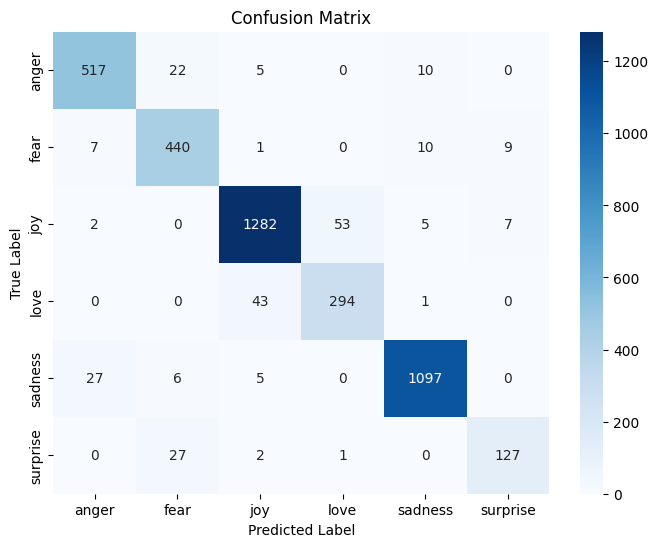

In [28]:
# Compute confusion matrix
conf_mat = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues',
            xticklabels=labelencoder.classes_,
            yticklabels=labelencoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [34]:
# Use the loaded model for prediction
input_text = input("Enter your input text: ")
encoded_input = tokenizer(input_text, padding=True, truncation=True, return_tensors='tf')
logits = loaded_bert_model.predict(encoded_input)[0]
predicted_class = tf.argmax(logits, axis=1).numpy()[0]
predicted_label = labelencoder.inverse_transform([predicted_class])[0]
print("Predicted label:", predicted_label)


Enter your input text: im not feeling well
1/1 [==============================] - 0s 41ms/step
Predicted label: joy
